In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

%pylab inline
font = {'size'   : 18}
plt.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [40]:
URL = {'a': 'http://mini-kep.herokuapp.com/annual',
    'q': 'http://mini-kep.herokuapp.com/quarterly',
    'm': 'http://mini-kep.herokuapp.com/monthly'}

def read_csv(source):
    return pd.read_csv(source, converters={0: pd.to_datetime}, index_col=0)

dfa, dfq, dfm = (read_csv(URL[freq]) for freq in 'aqm')

<function matplotlib.pyplot.show>

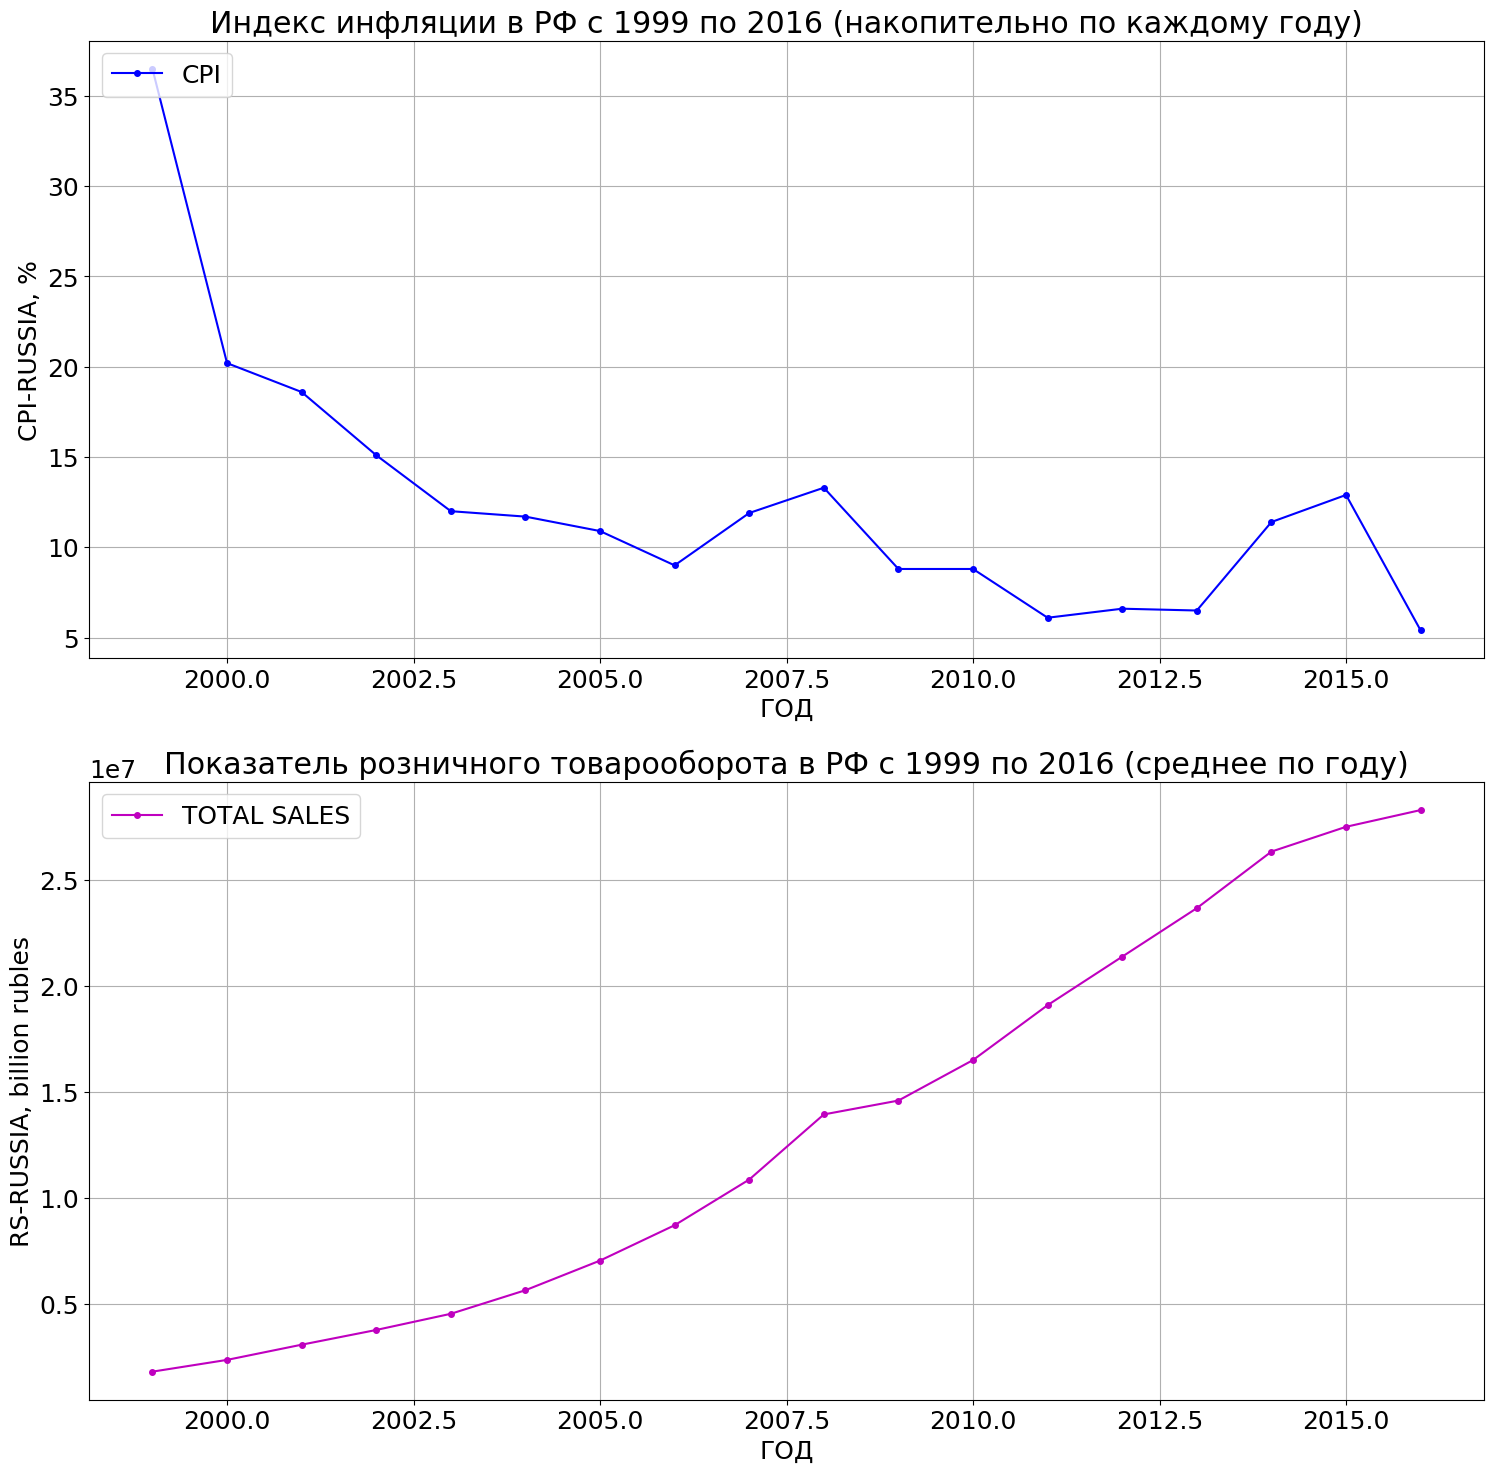

In [42]:
CPI_data = pd.DataFrame(np.array(dfa['year']), columns=[u'ГОД'])
CPI_data['CPI-RUSSIA'] = pd.DataFrame(np.array(dfa['CPI_rog']))-100

RS_data = pd.DataFrame(np.array(dfa['year']), columns=[u'ГОД'])
RS_data['RS-RUSSIA'] = pd.DataFrame(np.array(dfa['RETAIL_SALES_bln_rub']))*1000

fig, ax = plt.subplots(2, 1, figsize = (18, 18), dpi=100)

plt.subplot(2, 1, 1)

plt.plot(CPI_data[u'ГОД'], CPI_data['CPI-RUSSIA'], 'k-o', color='blue', markersize=4, label='CPI')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel(u'ГОД')
plt.ylabel('CPI-RUSSIA, %')
plt.title(u'Индекс инфляции в РФ с 1999 по 2016 (накопительно по каждому году)')

plt.subplot(2, 1, 2)
plt.plot(RS_data[u'ГОД'], RS_data['RS-RUSSIA'], 'k-o', color='m', markersize=4, label='TOTAL SALES')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel(u'ГОД')
plt.ylabel('RS-RUSSIA, billion rubles')
plt.title(u'Показатель розничного товарооборота в РФ с 1999 по 2016 (среднее по году)')

plt.show